Data Analysis Project: MPG and Model Year in Automobiles

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.animation import PillowWriter

We need to import our dataset, using the correct delimeters and labeling our columns accordingly. We will then turn it into a pandas DataFrame. We will also need to clean our data so we will check for any missing values.

In [3]:
data = pd.read_csv('auto-mpg.data', delimiter='\s+', header=None, names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Name']) # importing our data

df = pd.DataFrame(data) # turning data into pandas dataframe

df = df.replace('?',np.nan)

print(df.dtypes.to_frame(name='Data Types'))

is_clean = df.isnull().sum() # finds any missing values

clean_table = is_clean.to_frame(name='Missing Values') # makes a nice table with Missing Values as name

clean_table # print table

             Data Types
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
Name             object


,Missing Values
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0
Name,0


We can see that we have 6 missing values in Horsepower. It is a relatively unimportant data at this point of analysis so we can do a simply fill the missing values with the corresponding mean.

In [4]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

horse_mean = df['Horsepower'].mean()

df['Horsepower'].fillna(horse_mean, inplace=True)

df['Horsepower'].isnull().sum()


0


We need to define our independent and dependent variable. In this case Model Year is a much better fit for an independent variable (y) because of the natural ordering of it. In contrast, our dependent variable (x) will be MPG since we are trying to predict it according to Model Year.

In [20]:
x = df['Model Year'] # Defining x and y axes
y = df['MPG']



13


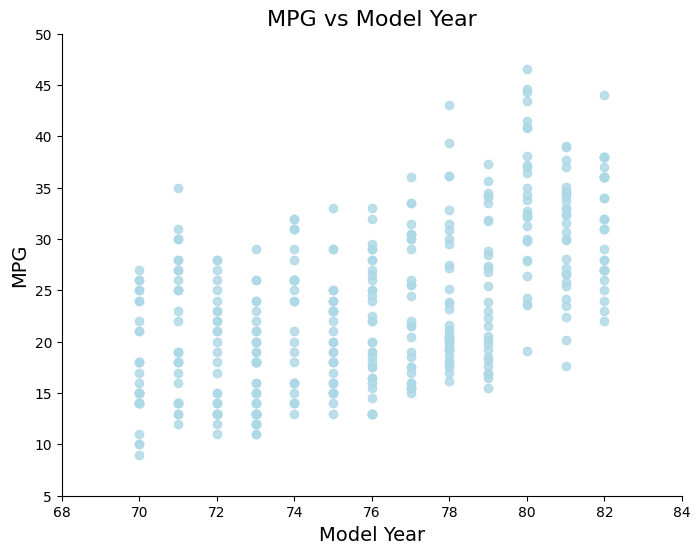

In [191]:
fig = plt.figure(1,figsize=(8,6))

scatter = plt.scatter([],[],c='lightblue',alpha=.8) # empty scatter plot

#plt.xticks([]) #Removes number labels
#plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines (the top and right border of our graph)
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

plt.xlabel('Model Year',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Model Year',fontsize=16) # Gives our plot a title

writer = PillowWriter(fps=2) # Creates our animation object with a slow speed of 2 fps

x_list = [] # define empty x list
y_list = [] # define empty y list

x_set = sorted(set(x)) # find all unique values

with writer.saving(fig,'Model_Year_vs_MPG.gif',100): # creates gif file
    for year in x_set: # for every unique year (ordered)

        y_values = df.loc[df['Model Year'] == year, 'MPG'].tolist() # get all the y values corresponding to that year (x)

        x_list.extend([year]*len(y_values)) # add the year (x) to the list for every y value associated with it
        y_list.extend(y_values) # add y values to list

        scatter.set_offsets(np.column_stack((x_list,y_list))) # creates scatterplot with those lists

        writer.grab_frame() # adds this frame to the gif

plt.show() # displays graph

We can see in the graph there seems to be a slight positive trend, with no obvious outliers. We will now investigate this further since a visualization can only give us a rough idea of what is going on 

In [192]:
r = x.corr(y,method='pearson') # calculates our correlation using pearson correlation

print(f"The correlation coefficient is {r}")

The correlation coefficient is 0.5792671330833096


In [193]:
Q1 = y.quantile(0.25) # Calculate our quartiles
Q3 = y.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upper = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lower = Q1 - (1.5 * IQR)

outliers = df['MPG'][(y < lower) | (y > upper)].values # search for outliers

print(f"The outliers are {outliers}")

The outliers are [46.6]


Our correlation analysis would also indicate that we have a slight positive correlation. We also checked for outliers which resulted in one small outliers which shouldn't affect our analysis. 



<br>
We are now going to implement a Simple Linear Regression because we are predicting a relationship between two variables, therefore being the most appropriate. This will give us further insight to the relation between our variables and help us identify any issues with our data.

In [194]:
lm = LinearRegression() # creating object

fitted_X = x.values.reshape(-1,1) # Reshaping so we can put in our fit function
fitted_Y = y.values

lm.fit(fitted_X,fitted_Y) # fit our data

pred_y = lm.predict(fitted_X) # makes a y prediction for every x value


We now are using our graph from before and adding a linear regression line using our predicted y values. This provides a great medium for us to see our predicted values.

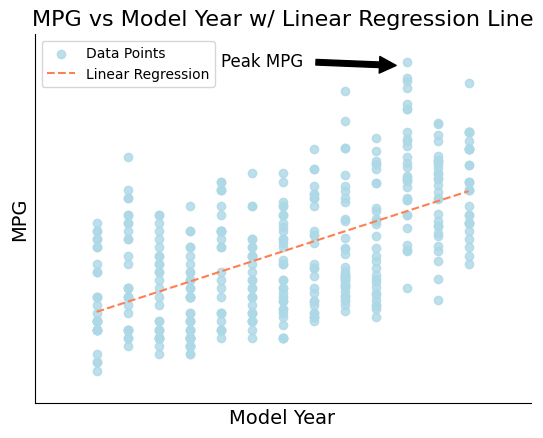

In [427]:

scatter = plt.scatter([],[],c='lightblue',alpha=.8,label='Data Points')

linReg, = plt.plot([],[],c='coral',label='Linear Regression',linestyle='--')

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(5,50)

plt.xlabel('Model Year',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Model Year w/ Linear Regression Line',fontsize=16) # gives a plot title

plt.legend()

writer = PillowWriter(fps=200)

x_list = []
y_list = []
z_list = []

with writer.saving(fig,'Model_Year_vs_MPG_LinReg.gif',100):
    for i in range(len(x)): 

        x_list.append(x[i])
        y_list.append(y[i])

        x_train = np.array(x_list).reshape(-1,1)
        y_train = np.array(y_list).reshape(-1,1)

        lm.fit(x_train,y_train)

        predict_y = lm.predict(x_train)

        z_list.append(predict_y[0])

        scatter.set_offsets(np.column_stack((x_list,y_list)))
        linReg.set_data(x_train,predict_y)

        writer.grab_frame()

plt.annotate('Peak MPG', xy=(80, 46.1), xytext=(74, 46), fontsize=12,arrowprops=dict(facecolor='black',shrink=.1))

plt.show()

This graph provides a great visual for seeing our predicted values versus our actual values. However there is obviously a lot of variability in this graph. It would be beneficial to use a more robust regression analysis.




<br>
We know that Weight and MPG are likely to have a strong correlation due to physics. Adding this feature could make our prediction for MPG much more accurate. We will start by investigating the correlation between Weight and MPG. A great way to start this investigation would be visualizing our data.


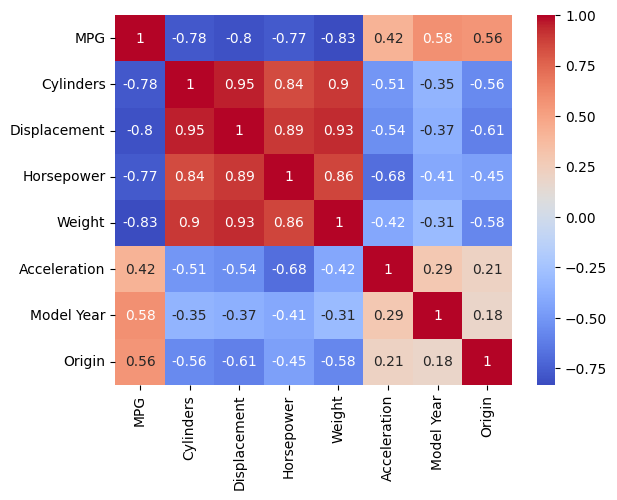

In [428]:
numerical_data = df.drop('Name',axis=1)

r_matrix = numerical_data.corr()

sns.heatmap(r_matrix,annot=True,cmap='coolwarm')
plt.show()

Text(0.5, 1.0, 'MPG vs Weight')

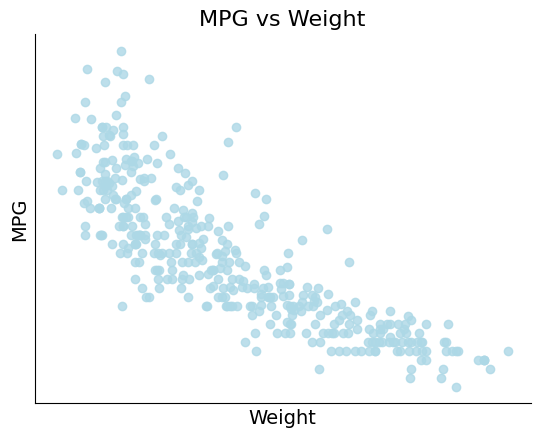

In [429]:
weight = df['Weight']

plt.scatter(weight,y,c='lightblue',alpha=.8)

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlabel('Weight',fontsize=14) # Gives our axes a label
plt.ylabel('MPG',fontsize=14)

plt.title('MPG vs Weight',fontsize=16) # Give our plot a title


With this visualization we see that there seems to be a strong negative correlation, possibly exponential decay, between MPG and Weight. We can also see some possible outliers. We will repeat our previous analysis and check more concretely for outliers and understand our correlation.

In [430]:
Q1 = weight.quantile(0.25) # Calculate our quartiles
Q3 = weight.quantile(0.75)

IQR = Q3 - Q1 # Get our IQR

upper = Q3 + (1.5 * IQR) # Find our lower and upper outlier bounds
lower = Q1 - (1.5 * IQR)

outliers = df['Weight'][(weight < lower) | (weight > upper)].values # search for outliers

print(f"The outliers are {outliers}")

The outliers are []


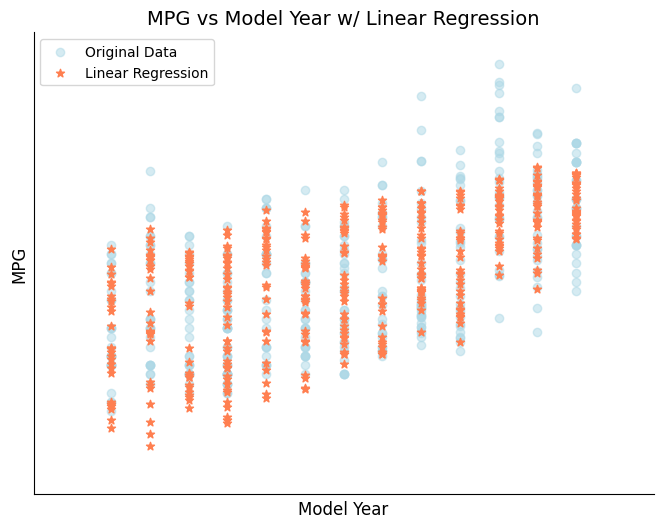

In [431]:
multiple_x = df[['Model Year', 'Weight']].values # creating an x intercept with Model Year and Weight

multiLM = LinearRegression() # Creating LinearRegression instance

multiLM.fit(multiple_x,y) # Fitting our x and y

multiPred_y = multiLM.predict(multiple_x) # getting our prediction array

fig = plt.figure(1,figsize=(8,6)) #changes the physical size of the plot

plt.xticks([]) #Removes number labels
plt.yticks([])

plt.gca().spines['top'].set_visible(False) # Removes spines
plt.gca().spines['right'].set_visible(False)

plt.xlim(68,84) # Scales our graph
plt.ylim(0,50)

plt.xlabel('Model Year',fontsize=12) # Gives our axes a label
plt.ylabel('MPG',fontsize=12)

plt.title('MPG vs Model Year w/ Linear Regression',fontsize=14) # gives a plot title

plt.scatter(x, y, c='lightblue', alpha=.5, label='Original Data') # plot original data
plt.scatter(x, multiPred_y,c='coral', alpha=1.0, label='Linear Regression',marker='*') # plot linear regression line

plt.legend() # add legend
plt.grid() # add grid

From this data visualization we can obviously tell this fits the data much better than our Simple Linear Regression. We will now calculate the variation between the two too get an understanding of the magnitude. We will use R^2 score because it is a better for comparing correlation between two different things. This is because the score is more intituitive then the regular R score.

In [432]:


r2 = r2_score(y,pred_y) # r2 score for our simple linear regression
print(f"The R^2 score for our Simple Linear Regression {r2}")

multi_r2 = r2_score(y,multiPred_y) # r2 score for our multiple linear regression
print(f"The R^2 score for our Multiple Linear Regression {multi_r2}")

r2_Improvement = (multi_r2 / r2) * 100
print(f"The Multiple Linear Regression explains our variation more by a magnitude of {r2_Improvement}%")



The R^2 score for our Simple Linear Regression 0.33555041147055686
The R^2 score for our Multiple Linear Regression 0.8078621345742751
The Multiple Linear Regression explains our variation more by a magnitude of 240.75730708652748%
